In [1]:
import sys
import os
project_path = "/home/lixiangyu/multi-omics/MOMG"
sys.path.append(project_path)
from package import  DMG, clustering, mclust_R

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


cpu


In [1]:
import scanpy as sc
adata_file='/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E13_5/E13_5_cluster6_11.h5ad'
adata=sc.read(adata_file)
print(adata)

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 1777 × 17438
    obs: 'ground_truth', 'mclust', 'SpatialGlue_6', 'SpatialGlue_7', 'SpatialGlue_8', 'SpatialGlue_9', 'SpatialGlue_10', 'SpatialGlue_11', 'no_image_899_8', 'resnet_8210_9', 'annotation', 'resnet_v2_828_6', 'resnet_v2_828_8', 'Seurat_6', 'Seurat_7', 'Seurat_8', 'Seurat_9', 'Seurat_10', 'Seurat_11', 'ATAC', 'RNA', 'MISO_6', 'MISO_7', 'MISO_8', 'MISO_9', 'MISO_10', 'MISO_11', 'MISO_rp_4', 'MISO_rp_5', 'MISO_rp_6', 'MISO_rp_7', 'MISO_rp_8', 'MISO_rp_9', 'MISO_rp_10', 'MISO_rp_11', 'no_image', 'resnet', 'MISO_12', 'MISO_13', 'MISO_14', 'MISO_15'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ATAC_colors', 'MISO_9_colors', 'MISO_rp_9_colors', 'RNA_colors', 'Seurat_6_colors', 'SpatialGlue_10_colors', 'SpatialGlue_11_colors', 'SpatialGlue_12_colors', 'SpatialGlue_6_colors', 'SpatialGlue_7_colors', 'SpatialGlue_8_colors', 'SpatialGlue_9_colors', 'adj_spatial', 'anno

AnnData object with n_obs × n_vars = 1777 × 31433
    obs: 'ground_truth'
    obsm: 'spatial'


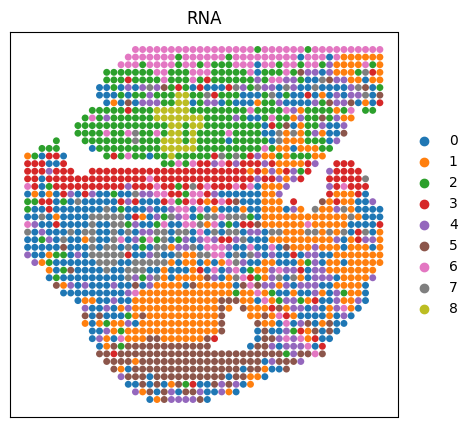

In [55]:
# Leiden画RNA单模态聚类图
import scanpy as sc
import matplotlib.pyplot as plt
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E13_5/'
adata_omics1 = sc.read_h5ad(file_fold + 'RNA.h5ad')
print(adata_omics1)

sc.pp.filter_genes(adata_omics1, min_cells=10)
sc.pp.highly_variable_genes(adata_omics1, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata_omics1, target_sum=1e4)
sc.pp.log1p(adata_omics1)

adata_hvg = adata_omics1[:, adata_omics1.var['highly_variable']]
sc.tl.pca(adata_omics1, n_comps=50)
sc.pp.neighbors(adata_omics1, n_neighbors=10, n_pcs=50)
sc.tl.leiden(adata_omics1, resolution=0.90)

custom_colors = [
    '#7da494',  # Gold
    '#dba0c1',  # BlueViolet
    '#9f8db8',  # qianzi
    '#d0d08a',  # Blue
    '#abc8e5',  # molv
    '#e5a79a',  # tufen
]
adata_omics1.uns['leiden_colors'] = custom_colors

import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E13_5/RNA.png'
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata_omics1, basis='spatial', color='leiden', ax=ax, title='RNA', s=100, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()


AnnData object with n_obs × n_vars = 1777 × 24333
    obs: 'ground_truth'
    obsm: 'spatial'


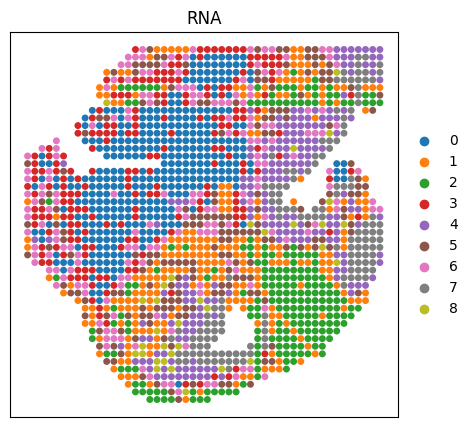

In [56]:
# Leiden画RNA单模态聚类图
import scanpy as sc
import matplotlib.pyplot as plt
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E13_5/'
adata_omics2 = sc.read_h5ad(file_fold + 'ATAC.h5ad')
print(adata_omics2)

sc.pp.filter_genes(adata_omics2, min_cells=10)
sc.pp.highly_variable_genes(adata_omics2, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata_omics2, target_sum=1e4)
sc.pp.log1p(adata_omics2)

adata_hvg = adata_omics2[:, adata_omics2.var['highly_variable']]
sc.tl.pca(adata_omics2, n_comps=50)
sc.pp.neighbors(adata_omics2, n_neighbors=10, n_pcs=50)
sc.tl.leiden(adata_omics2, resolution=1.6)

custom_colors = [
  '#7da494',  # Gold
  '#dba0c1',  # BlueViolet
  '#9f8db8',  # qianzi
  '#d0d08a',  # Blue
  '#abc8e5',  # molv
  '#e5a79a',  # tufen
]
adata_omics2.uns['leiden_colors'] = custom_colors

import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E13_5/ATAC.png'
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata_omics2, basis='spatial', color='leiden', ax=ax, title='RNA', s=100, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()


In [58]:
adata.obs['RNA']=adata_omics1.obs['leiden']
print(adata)
adata.obs['ATAC']=adata_omics2.obs['leiden']
print(adata)
adata_file='/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E13_5/E13_5_cluster6_11.h5ad'
#adata.write(adata_file)

AnnData object with n_obs × n_vars = 1777 × 17438
    obs: 'ground_truth', 'mclust', 'SpatialGlue_6', 'SpatialGlue_7', 'SpatialGlue_8', 'SpatialGlue_9', 'SpatialGlue_10', 'SpatialGlue_11', 'no_image_899_8', 'resnet_8210_9', 'annotation', 'resnet_v2_828_6', 'resnet_v2_828_8', 'Seurat_6', 'Seurat_7', 'Seurat_8', 'Seurat_9', 'Seurat_10', 'Seurat_11', 'ATAC', 'RNA', 'MISO_6', 'MISO_7', 'MISO_8', 'MISO_9', 'MISO_10', 'MISO_11', 'MISO_rp_4', 'MISO_rp_5', 'MISO_rp_6', 'MISO_rp_7', 'MISO_rp_8', 'MISO_rp_9', 'MISO_rp_10', 'MISO_rp_11', 'no_image', 'resnet'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ATAC_colors', 'MISO_9_colors', 'MISO_rp_9_colors', 'RNA_colors', 'Seurat_6_colors', 'SpatialGlue_10_colors', 'SpatialGlue_11_colors', 'SpatialGlue_12_colors', 'SpatialGlue_6_colors', 'SpatialGlue_7_colors', 'SpatialGlue_8_colors', 'SpatialGlue_9_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'log1p', 'no_image_89

In [ ]:
import pandas as pd
file_fold = "/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E13_5/"
cluster = pd.read_csv(file_fold+'cluster_csv/UnitedNet/none_E13_5_0.9_0.9_0.8_10_mclust_DMG_embedding_mclust9.csv')
adata.obs['no_image'] = cluster['mclust'].values
cluster = pd.read_csv(file_fold+'cluster_csv/UnitedNet/resnet_v2_E13_5_0.7_0.3_0.8_100_mclust_DMG_embedding_mclust9.csv')
adata.obs['resnet'] = cluster['mclust'].values
#adata.write(adata_file)

In [ ]:
adata.obs['annotation'], _ = pd.factorize(adata.obs['ground_truth'])
print(adata.obs)

In [1]:
import scanpy as sc
adata_file='/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E13_5/E13_5_cluster6_11.h5ad'
adata=sc.read(adata_file)
print(adata)

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 1777 × 17438
    obs: 'ground_truth', 'mclust', 'SpatialGlue_6', 'SpatialGlue_7', 'SpatialGlue_8', 'SpatialGlue_9', 'SpatialGlue_10', 'SpatialGlue_11', 'no_image_899_8', 'resnet_8210_9', 'annotation', 'resnet_v2_828_6', 'resnet_v2_828_8', 'Seurat_6', 'Seurat_7', 'Seurat_8', 'Seurat_9', 'Seurat_10', 'Seurat_11', 'ATAC', 'RNA', 'MISO_6', 'MISO_7', 'MISO_8', 'MISO_9', 'MISO_10', 'MISO_11', 'MISO_rp_4', 'MISO_rp_5', 'MISO_rp_6', 'MISO_rp_7', 'MISO_rp_8', 'MISO_rp_9', 'MISO_rp_10', 'MISO_rp_11', 'no_image', 'resnet', 'MISO_12', 'MISO_13', 'MISO_14', 'MISO_15'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ATAC_colors', 'MISO_9_colors', 'MISO_rp_9_colors', 'RNA_colors', 'Seurat_6_colors', 'SpatialGlue_10_colors', 'SpatialGlue_11_colors', 'SpatialGlue_12_colors', 'SpatialGlue_6_colors', 'SpatialGlue_7_colors', 'SpatialGlue_8_colors', 'SpatialGlue_9_colors', 'adj_spatial', 'anno

In [2]:
import scanpy as sc
adata_file='/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E13_5/E13_5_cluster6_11.h5ad'
adata=sc.read(adata_file)
custom_colors = [
    
    '#D0D1CD',
    '#40AE91',
    '#D6608A',
    '#E8A16D',
    '#8F9D27',  
    '#49A836', 
    '#957EB2',  
    '#4D5BA0',  
    '#23A9AD', 
    '#fcb359',  # tufen
    '#45d5b6'  # tufen
]

# # 为两个数据集设置相同的颜色映射
# adata.uns['RNA_cluster_colors'] = custom_colors
# adata.uns['ADT_cluster_colors'] = custom_colors
adata.uns['annotation_colors'] = custom_colors
# adata.uns['Seurat_colors'] = custom_colors
adata.uns['SpatialGlue_6_colors'] = custom_colors
adata.uns['SpatialGlue_7_colors'] = custom_colors
adata.uns['SpatialGlue_8_colors'] = custom_colors
adata.uns['SpatialGlue_9_colors'] = custom_colors
adata.uns['SpatialGlue_10_colors'] = custom_colors
adata.uns['SpatialGlue_11_colors'] = custom_colors
adata.uns['SpatialGlue_12_colors'] = custom_colors
# adata.uns['MOMG_colors'] = custom_colors
#adata.uns['anno_num_colors'] = custom_colors
adata.uns['no_image_colors'] = custom_colors
adata.uns['resnet_colors'] = custom_colors
adata.uns['Seurat_6_colors'] = custom_colors
adata.uns['RNA_colors'] = custom_colors
adata.uns['ATAC_colors'] = custom_colors
adata.uns['MISO_9_colors'] = custom_colors
adata.uns['MISO_rp_9_colors'] = custom_colors
adata.write(adata_file)

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
#adata.obs['Seurat'] = adata.obs['Seurat'].astype('category')
# adata.obs['no_image_697_11'] = adata.obs['no_image_697_11'].astype('category')
adata.obs['annotation'] = adata.obs['annotation'].astype('category')
adata.obs['resnet'] = adata.obs['resnet'].astype('category')
adata.obs['no_image'] = adata.obs['no_image'].astype('category')
adata.obs['ATAC'] = adata.obs['ATAC'].astype('category')
adata.obs['RNA'] = adata.obs['RNA'].astype('category')
adata.obs['Seurat_6'] = adata.obs['Seurat_6'].astype('category')
adata.obs['Seurat_9'] = adata.obs['Seurat_9'].astype('category')
adata.obs['SpatialGlue_9'] = adata.obs['SpatialGlue_9'].astype('category')
adata.obs['MISO_9'] = adata.obs['MISO_9'].astype('category')
adata.obs['MISO_rp_9'] = adata.obs['MISO_rp_9'].astype('category')
#adata.write(adata_file)

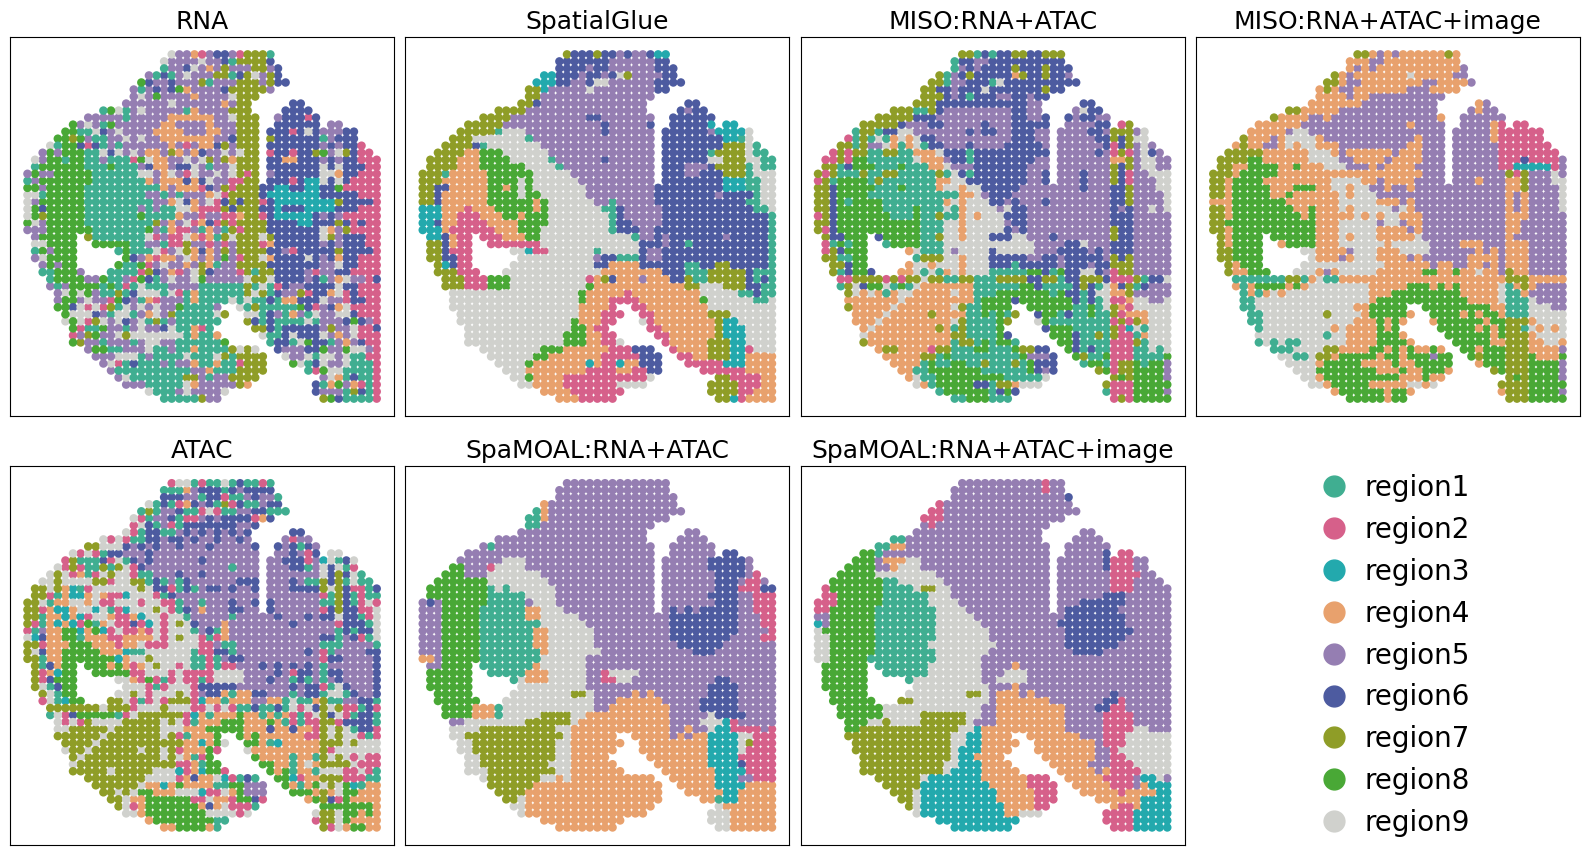

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 10

adata.obsm['spatial_rotated'] = adata.obsm['spatial'].copy()
adata.obsm['spatial_rotated'][:, 0] = adata.obsm['spatial'][:, 1]
adata.obsm['spatial_rotated'][:, 1] = -adata.obsm['spatial'][:, 0]

fig, ax_list = plt.subplots(2, 4, figsize=(16, 9))
s_size = 150



#sc.pl.embedding(adata, basis='spatial', color='annotation',title='annotation', ax=ax_list[1,3],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='RNA', ax=ax_list[0,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='SpatialGlue_9',title='SpatialGlue', ax=ax_list[0,1],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='MISO_rp_9',title='MISO:RNA+ATAC', ax=ax_list[0,2],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='MISO_9', title='MISO:RNA+ATAC+image',ax=ax_list[0,3],s=s_size, show=False)

sc.pl.embedding(adata, basis='spatial_rotated', color='ATAC', ax=ax_list[1,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='no_image',title='SpaMOAL:RNA+ATAC',  ax=ax_list[1,1], s=s_size,show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='resnet', title='SpaMOAL:RNA+ATAC+image',ax=ax_list[1,2], s=s_size,show=False)


# 移除图例
for row in ax_list:
    for ax in row:
        legend = ax.get_legend()
        if legend:
            legend.remove()
            
# 隐藏坐标轴
for row in ax_list:
    for ax in row:
        ax.set_title(ax.get_title(), fontsize=18)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# 创建自定义图例
custom_legend = {
    # '1':'#D0D1CD',
    # '2':'#40AE91',
    # '3':'#D6608A',
    # '4':'#E8A16D',
    # '5':'#8F9D27',  
    # '6':'#49A836', 
    # '7':'#957EB2',  
    # '8':'#4D5BA0',  
    # '9':'#23A9AD', 
    'region1':'#40AE91',
    'region2':'#D6608A',
    'region3':'#23A9AD',
    'region4':'#E8A16D',
    'region5':'#957EB2',  
    'region6':'#4D5BA0', 
    'region7':'#8F9D27',  
    'region8':'#49A836',  
    'region9':'#D0D1CD', 
    
}

# 创建带小圆点的自定义图例
legend_elements = [
    mlines.Line2D(
        [], [], 
        color=color, 
        marker='o', 
        linestyle='None',
        markersize=15,  # 标记点大小
        label=label
    )
    for label, color in custom_legend.items()
]

# 在特定子图上添加自定义图例

ax_list[1, 3].legend(
    handles=legend_elements,
    loc='center',
    fontsize=20,
    frameon=False,
    ncol=1,
    handletextpad=0.1
)
ax_list[1, 3].set_frame_on(False)

# 调整子图间距
plt.tight_layout(w_pad=0.8)

# 保存和显示图表
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E13_5/'
plt.savefig(file_fold + 'cluster_all.png', format='png')
plt.show()

In [3]:
import pandas as pd
import scanpy as sc
# list_RNA = ['4','1','6','7','3','5','0','8','2']
# adata.obs['RNA']  = pd.Categorical(adata.obs['RNA'], 
#                       categories=list_RNA,
#                       ordered=True)
# list_ATAC = ['1','6','5','4','2','7','0','3','8']
# adata.obs['ATAC']  = pd.Categorical(adata.obs['ATAC'], 
#                       categories=list_ATAC,
#                       ordered=True)

# list_resnet = [1,8,6,2,5,9,4,3,7]
# adata.obs['resnet']  = pd.Categorical(adata.obs['resnet'], 
#                       categories=list_resnet,
#                       ordered=True)
# list_no_image = [2,9,4,6,1,8,3,7,5]
# adata.obs['no_image']  = pd.Categorical(adata.obs['no_image'], 
#                       categories=list_no_image,
#                       ordered=True)
                      
list_MISO_9 = [3,0,2,4,1,7,5,6,8]
adata.obs['MISO_9']  = pd.Categorical(adata.obs['MISO_9'], 
                      categories=list_MISO_9,
                      ordered=True)
# list_MISO_rp_9 = [4,1,6,2,5,0,3,7,8]
# adata.obs['MISO_rp_9']  = pd.Categorical(adata.obs['MISO_rp_9'], 
#                       categories=list_MISO_rp_9,
#                       ordered=True)                    
# list_SpatialGlue_9 = [1,3,8,9,2,6,7,4,5]
# adata.obs['SpatialGlue_9']  = pd.Categorical(adata.obs['SpatialGlue_9'], 
#                       categories=list_SpatialGlue_9,
#                       ordered=True)

# list_annotation = [0,6,3,5,4,7,1,2]
# adata.obs['annotation']  = pd.Categorical(adata.obs['annotation'], 
#                       categories=list_annotation,
#                       ordered=True)


#adata.write(adata_file)

In [21]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn.metrics import (
    adjusted_mutual_info_score as AMI,
    normalized_mutual_info_score as NMI,
    adjusted_rand_score as ARI,
    homogeneity_score,
    v_measure_score,
    mutual_info_score
)

true_labels = adata.obs['annotation'].values  # 获取真实标签

# 定义要评估的所有聚类结果列名
cluster_columns = [
    'SpatialGlue_9',
    'MISO_rp_9', 
    'MISO_9',
    'no_image',
    'resnet'
]

# 初始化结果字典
metrics_results = {}

# 计算每个聚类结果的指标
for col in cluster_columns:
    predicted_labels = adata.obs[col].values
    
    metrics_results[col] = {
        'AMI': AMI(true_labels, predicted_labels),
        'NMI': NMI(true_labels, predicted_labels),
        'ARI': ARI(true_labels, predicted_labels),
        'Homogeneity': homogeneity_score(true_labels, predicted_labels),
        'V-measure': v_measure_score(true_labels, predicted_labels),
        'Mutual Information': mutual_info_score(true_labels, predicted_labels)
    }

# 打印表头
print("Method\t\tAMI\t\tNMI\t\tARI\t\tHomogeneity\tV-measure\tMutual Info")
print("-"*90)

# 打印每个方法的结果
for method, metrics in metrics_results.items():
    print(f"{method:<15}", end="")
    for metric_name in ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']:
        print(f"{metrics[metric_name]:.4f},\t", end="")
    print()  # 换行

Method		AMI		NMI		ARI		Homogeneity	V-measure	Mutual Info
------------------------------------------------------------------------------------------
SpatialGlue_9  0.4540,	0.4590,	0.3864,	0.5127,	0.4590,	0.8340,	
MISO_rp_9      0.3796,	0.3848,	0.2975,	0.4270,	0.3848,	0.6946,	
MISO_9         0.3602,	0.3660,	0.2828,	0.3707,	0.3660,	0.6031,	
no_image       0.4815,	0.4865,	0.5035,	0.5128,	0.4865,	0.8341,	
resnet         0.4847,	0.4896,	0.5143,	0.5291,	0.4896,	0.8607,	


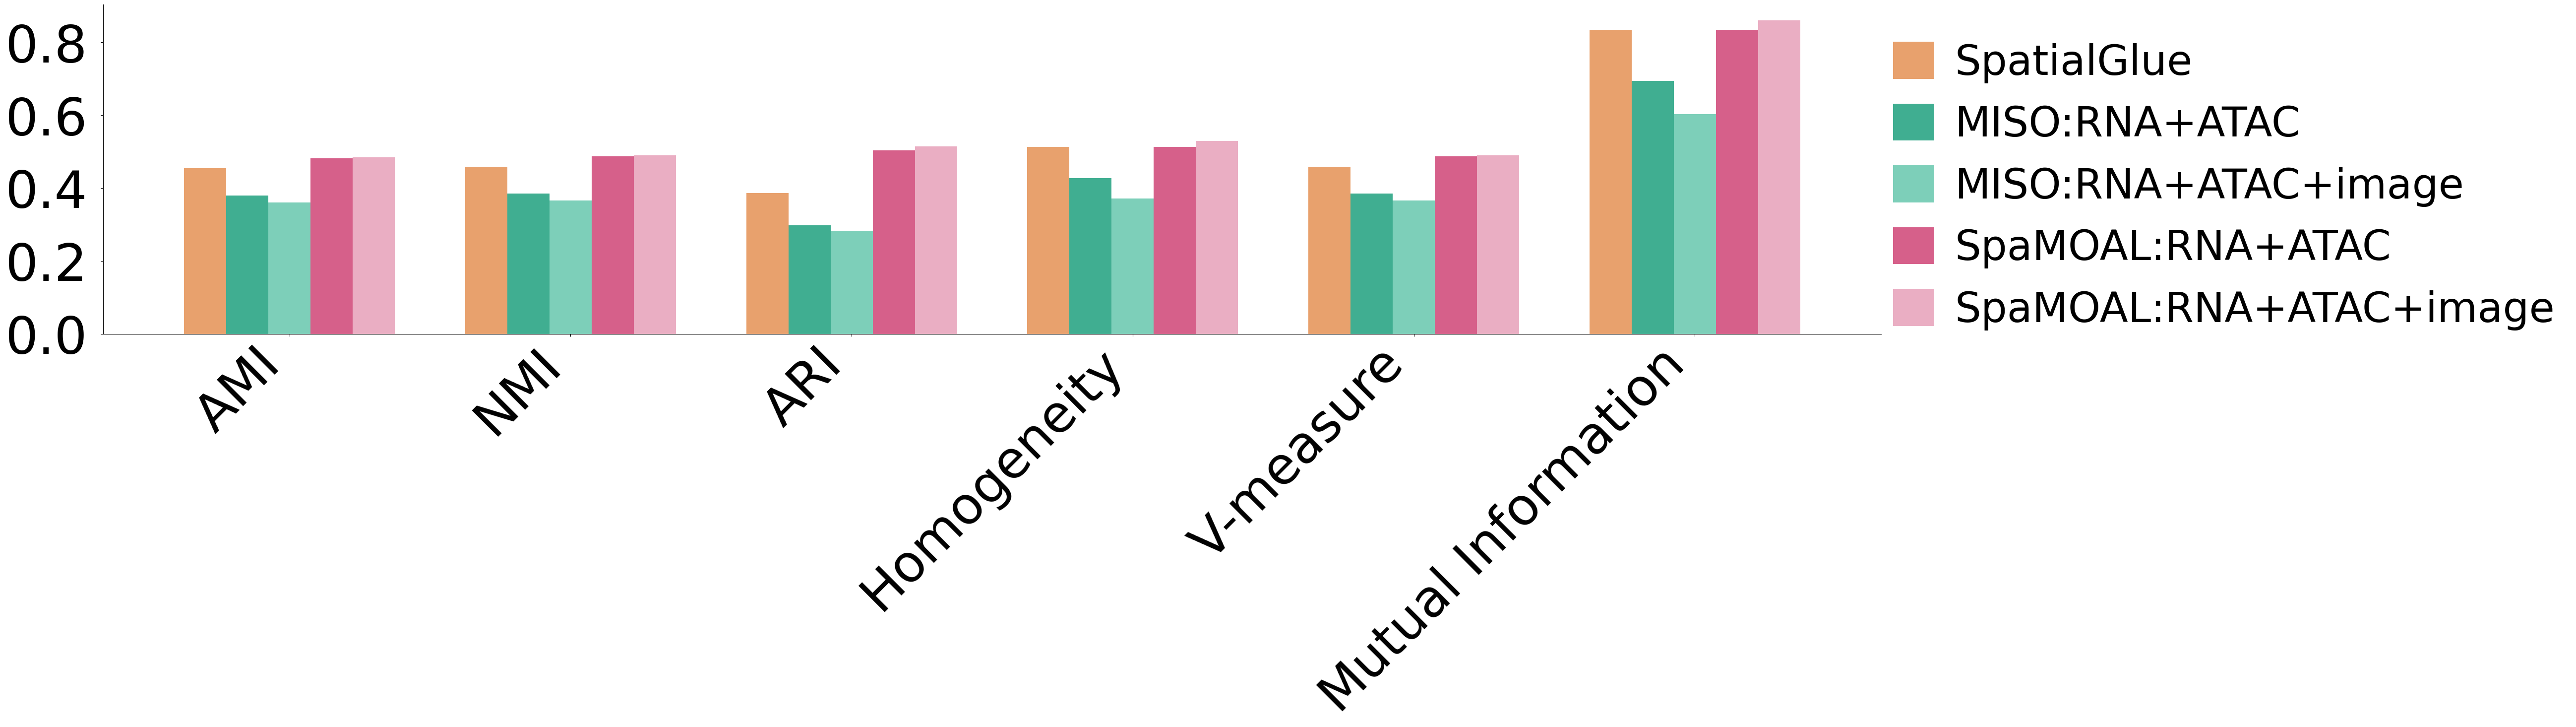

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['SpatialGlue', 'MISO:RNA+ATAC','MISO:RNA+ATAC+image', 'SpaMOAL:RNA+ATAC','SpaMOAL:RNA+ATAC+image']
data = {
    'SpatialGlue': [0.4540,	0.4590,	0.3864,	0.5127,	0.4590,	0.8340],
    'MISO:RNA+ATAC': [0.3796,	0.3848,	0.2975,	0.4270,	0.3848,	0.6946],
    'MISO:RNA+ATAC+image':[0.3602,	0.3660,	0.2828,	0.3707,	0.3660,	0.6031,],
    'SpaMOAL:RNA+ATAC': [0.4815,	0.4865,	0.5035,	0.5128,	0.4865,	0.8341],
    'SpaMOAL:RNA+ATAC+image':[0.4847,	0.4896,	0.5143,	0.5291,	0.4896,	0.8607]
}

# 设置图形大小
fig, ax = plt.subplots(figsize=(55, 15))
plt.rcParams['font.size'] = 18
# 设置条形宽度
bar_width = 0.15
index = np.arange(len(labels))

# 定义颜色列表
colors = ['#E8A16D', '#40AE91', '#7dcfb9', '#D6608A',"#eaaec3"]

# 绘制条形图，并指定颜色
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method, color=colors[i])

# 设置图例，调整标记为正方形
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.5, fontsize=60, 
          frameon=False, handlelength=1, handleheight=1, handletextpad=0.5)
# 获取图例的字体属性
legend_text = legend.get_texts()[0]
legend_font = legend_text.get_fontproperties()

# 提取字体属性（不包括大小）
font_family = legend_font.get_family()

ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=75,family=font_family)

ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.yticks(fontsize=75)
ax.tick_params(axis='y', pad=20)

# 隐藏顶部和右侧的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 显示图形
plt.tight_layout()
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E13_5/metrics_default.png', format='png')

plt.show()

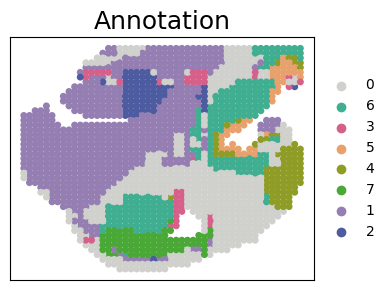

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 10

# 创建单个子图
fig, ax = plt.subplots(1, 1, figsize=(4, 3))  # 调整图的大小
s_size = 100  # 点的大小

# 绘制空间分布图
sc.pl.embedding(
    adata, 
    basis='spatial', 
    color='annotation', 
    title='Annotation', 
    ax=ax, 
    s=s_size, 
    show=False
)

# 设置标题字体大小
ax.set_title(ax.get_title(), fontsize=18)

# 隐藏坐标轴
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# 调整布局
plt.tight_layout()

# 保存图像
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E13_5/'
plt.savefig(file_fold + 'cluster_annotation.png', format='png', dpi=300)

# 显示图像
plt.show()

In [ ]:
import pandas as pd
import scanpy as sc
list_RNA = ['4','1','6','7','3','5','0','2','8']
adata.obs['RNA']  = pd.Categorical(adata.obs['RNA'], 
                      categories=list_RNA,
                      ordered=True)
list_ATAC = ['1','6','5','4','2','7','0','3','8']
adata.obs['ATAC']  = pd.Categorical(adata.obs['ATAC'], 
                      categories=list_ATAC,
                      ordered=True)
'''
list_resnet = [1,8,6,2,5,9,4,3,7]
adata.obs['resnet']  = pd.Categorical(adata.obs['resnet'], 
                      categories=list_resnet,
                      ordered=True)
list_no_image = [2,9,4,6,1,8,3,7,5]
adata.obs['no_image']  = pd.Categorical(adata.obs['no_image'], 
                      categories=list_no_image,
                      ordered=True)
                      '''
# list_MISO_9 = [7,0,2,8,4,1,6,5,3]
# adata.obs['MISO_9']  = pd.Categorical(adata.obs['MISO_9'], 
#                       categories=list_MISO_9,
#                       ordered=True)
# list_MISO_rp_9 = [4,1,6,2,5,0,3,7,8]
# adata.obs['MISO_rp_9']  = pd.Categorical(adata.obs['MISO_rp_9'], 
#                       categories=list_MISO_rp_9,
#                       ordered=True)                    
# list_SpatialGlue_9 = [1,3,8,9,2,6,7,4,5]
# adata.obs['SpatialGlue_9']  = pd.Categorical(adata.obs['SpatialGlue_9'], 
#                       categories=list_SpatialGlue_9,
#                       ordered=True)

# list_annotation = [0,6,3,5,4,7,1,2]
# adata.obs['annotation']  = pd.Categorical(adata.obs['annotation'], 
#                       categories=list_annotation,
#                       ordered=True)


#adata.write(adata_file)

In [22]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn.metrics import (
    adjusted_mutual_info_score as AMI,
    normalized_mutual_info_score as NMI,
    adjusted_rand_score as ARI,
    homogeneity_score,
    v_measure_score,
    mutual_info_score
)


adata = sc.read('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E13_5/E13_5_cluster6_11.h5ad')
# 假设 adata 和 adata2 是已经加载的 AnnData 对象
adata.obs['annotation'], _ = pd.factorize(adata.obs['ground_truth'])

true_labels = adata.obs['annotation'].values  # 获取真实标签

# 初始化一个字典来存储所有指标的结果
metrics_results = {}

# 遍历聚类结果列
for i in range(6, 12):
    predicted_labels = adata.obs[f'MISO_{i}'].values  # 获取聚类结果
    
    # 计算各项指标
    ami = AMI(true_labels, predicted_labels)
    nmi = NMI(true_labels, predicted_labels)
    ari = ARI(true_labels, predicted_labels)
    homogeneity = homogeneity_score(true_labels, predicted_labels)
    v_measure = v_measure_score(true_labels, predicted_labels)
    mutual_info = mutual_info_score(true_labels, predicted_labels)
    
    # 将结果存储到字典中
    metrics_results[f'Seurat_{i}'] = {
        'AMI': ami,
        'NMI': nmi,
        'ARI': ari,
        'Homogeneity': homogeneity,
        'V-measure': v_measure,
        'Mutual Information': mutual_info
    }

# 打印或返回结果
for cluster_result, metrics in metrics_results.items():
    for metric_name, value in metrics.items():
        print(f"{value:.4f},",end=' ')
    print()

0.3413, 0.3455, 0.2542, 0.3323, 0.3455, 0.5406, 
0.3363, 0.3412, 0.2115, 0.3495, 0.3412, 0.5685, 
0.3607, 0.3658, 0.2381, 0.3971, 0.3658, 0.6460, 
0.3634, 0.3691, 0.2015, 0.4144, 0.3691, 0.6742, 
0.3522, 0.3583, 0.2651, 0.4036, 0.3583, 0.6566, 
0.3654, 0.3718, 0.2157, 0.4108, 0.3718, 0.6683, 


In [ ]:
import pandas as pd
file_fold = "/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E13_5/"
csv_fold=file_fold+'cluster_csv/Seurat/'

cluster_data = pd.read_csv(csv_fold+'wnn_meta_6.csv', index_col=0)
adata.obs['Seurat_6'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_7.csv', index_col=0)
adata.obs['Seurat_7'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_8.csv', index_col=0)
adata.obs['Seurat_8'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_9.csv', index_col=0)
adata.obs['Seurat_9'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_10.csv', index_col=0)
adata.obs['Seurat_10'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_11.csv', index_col=0)
adata.obs['Seurat_11'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'rna_8.csv', index_col=0)
adata.obs['RNA'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'atac_8.csv', index_col=0)
adata.obs['ATAC'] = cluster_data['seurat_clusters'].values


print(adata.obs)
adata.write('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E13_5/E13_5_cluster6_11.h5ad')

In [27]:
import re

# 你的文本数据
data = """
metrics:mclust====================================================
{'AMI': 0.4409524897956797, 'NMI': 0.4446466767798372, 'ARI': 0.48387744494237733, 'Homogeneity': 0.42460840668927685, 'V-measure': 0.4446466767798372, 'Mutual Information': 0.6907103197001725}
alpha=0.9, beta=0.9, lammbda=0.8, num_iters=10, model=none, distance=none, n_clusters=6
metrics:mclust====================================================
{'AMI': 0.4655147071948242, 'NMI': 0.4696709439115611, 'ARI': 0.5095282178247033, 'Homogeneity': 0.4623366000160444, 'V-measure': 0.4696709439115611, 'Mutual Information': 0.7520827561943735}
alpha=0.9, beta=0.9, lammbda=0.8, num_iters=10, model=none, distance=none, n_clusters=7
metrics:mclust====================================================
{'AMI': 0.4536945991207711, 'NMI': 0.4584081684653725, 'ARI': 0.48487987294448615, 'Homogeneity': 0.47307948700050634, 'V-measure': 0.4584081684653725, 'Mutual Information': 0.769558206012706}
alpha=0.9, beta=0.9, lammbda=0.8, num_iters=10, model=none, distance=none, n_clusters=8
metrics:mclust====================================================
{'AMI': 0.4814520437522156, 'NMI': 0.4864904470203731, 'ARI': 0.5034721186364397, 'Homogeneity': 0.5127546615462377, 'V-measure': 0.4864904470203731, 'Mutual Information': 0.8340977960512428}
alpha=0.9, beta=0.9, lammbda=0.8, num_iters=10, model=none, distance=none, n_clusters=9

metrics:mclust====================================================
{'AMI': 0.4551215409268962, 'NMI': 0.46085506972910995, 'ARI': 0.4671953355806203, 'Homogeneity': 0.5048870431379243, 'V-measure': 0.46085506972911, 'Mutual Information': 0.8212995444375817}
alpha=0.9, beta=0.9, lammbda=0.8, num_iters=10, model=none, distance=none, n_clusters=10
metrics:mclust====================================================
{'AMI': 0.456963223514231, 'NMI': 0.4626663794322703, 'ARI': 0.46820708613939266, 'Homogeneity': 0.507670229760001, 'V-measure': 0.4626663794322703, 'Mutual Information': 0.8258269529656154}
alpha=0.9, beta=0.9, lammbda=0.8, num_iters=10, model=none, distance=none, n_clusters=11

metrics:mclust====================================================
{'AMI': 0.34467071820940465, 'NMI': 0.34886557378803945, 'ARI': 0.28399120214650025, 'Homogeneity': 0.3396937355268025, 'V-measure': 0.34886557378803945, 'Mutual Information': 0.5525796592095334}
alpha=0.7, beta=0.3, lammbda=0.8, num_iters=100, model=resnet, distance=none, n_clusters=6
metrics:mclust====================================================
{'AMI': 0.3977357954797321, 'NMI': 0.40223361434414756, 'ARI': 0.4129848854734124, 'Homogeneity': 0.4045314202679633, 'V-measure': 0.4022336143441475, 'Mutual Information': 0.658051094185051}
alpha=0.7, beta=0.3, lammbda=0.8, num_iters=100, model=resnet, distance=none, n_clusters=7
metrics:mclust====================================================
{'AMI': 0.45938906662886825, 'NMI': 0.4639404397749235, 'ARI': 0.4900740771314384, 'Homogeneity': 0.48620404199907885, 'V-measure': 0.46394043977492355, 'Mutual Information': 0.7909079142054134}
alpha=0.7, beta=0.3, lammbda=0.8, num_iters=100, model=resnet, distance=none, n_clusters=8
metrics:mclust====================================================
{'AMI': 0.48474780653395844, 'NMI': 0.489571287353838, 'ARI': 0.51425388046331, 'Homogeneity': 0.5290936210280475, 'V-measure': 0.489571287353838, 'Mutual Information': 0.8606763746885413}
alpha=0.7, beta=0.3, lammbda=0.8, num_iters=100, model=resnet, distance=none, n_clusters=9
metrics:mclust====================================================
{'AMI': 0.4785509753822692, 'NMI': 0.4839711502448617, 'ARI': 0.5029388136520394, 'Homogeneity': 0.5334579991202261, 'V-measure': 0.48397115024486165, 'Mutual Information': 0.8677759067275929}
alpha=0.7, beta=0.3, lammbda=0.8, num_iters=100, model=resnet, distance=none, n_clusters=10
metrics:mclust====================================================
{'AMI': 0.4411991592672402, 'NMI': 0.44724491200428085, 'ARI': 0.3661258476245408, 'Homogeneity': 0.5241150949418103, 'V-measure': 0.44724491200428085, 'Mutual Information': 0.8525778083613397}
alpha=0.7, beta=0.3, lammbda=0.8, num_iters=100, model=resnet, distance=none, n_clusters=11
"""

# 使用正则表达式找到所有大括号内的数字
numbers = re.findall(r"{(.*?)}", data)

# 处理找到的字符串，将它们分割并转换为浮点数
extracted_numbers = []
for number_group in numbers:
    # 分割每个数字字符串，并将它们转换为浮点数
    numbers_list = [float(num.split(":")[1].strip()) for num in number_group.split(", ") if num]
    extracted_numbers.append(numbers_list)

# 打印提取的数字，不打印中括号
for numbers in extracted_numbers:
    print(", ".join(map(str, numbers)) + ",")

0.4409524897956797, 0.4446466767798372, 0.48387744494237733, 0.42460840668927685, 0.4446466767798372, 0.6907103197001725,
0.4655147071948242, 0.4696709439115611, 0.5095282178247033, 0.4623366000160444, 0.4696709439115611, 0.7520827561943735,
0.4536945991207711, 0.4584081684653725, 0.48487987294448615, 0.47307948700050634, 0.4584081684653725, 0.769558206012706,
0.4814520437522156, 0.4864904470203731, 0.5034721186364397, 0.5127546615462377, 0.4864904470203731, 0.8340977960512428,
0.4551215409268962, 0.46085506972910995, 0.4671953355806203, 0.5048870431379243, 0.46085506972911, 0.8212995444375817,
0.456963223514231, 0.4626663794322703, 0.46820708613939266, 0.507670229760001, 0.4626663794322703, 0.8258269529656154,
0.34467071820940465, 0.34886557378803945, 0.28399120214650025, 0.3396937355268025, 0.34886557378803945, 0.5525796592095334,
0.3977357954797321, 0.40223361434414756, 0.4129848854734124, 0.4045314202679633, 0.4022336143441475, 0.658051094185051,
0.45938906662886825, 0.463940439774

             Method              Metric     Value
0     MISO:RNA+ATAC                 AMI  0.386100
1     MISO:RNA+ATAC                 NMI  0.389800
2     MISO:RNA+ATAC                 ARI  0.307400
3     MISO:RNA+ATAC         Homogeneity  0.396400
4     MISO:RNA+ATAC           V-measure  0.389800
..              ...                 ...       ...
175  RNA+ATAC+image                 NMI  0.447245
176  RNA+ATAC+image                 ARI  0.366126
177  RNA+ATAC+image         Homogeneity  0.524115
178  RNA+ATAC+image           V-measure  0.447245
179  RNA+ATAC+image  Mutual Information  0.852578

[180 rows x 3 columns]


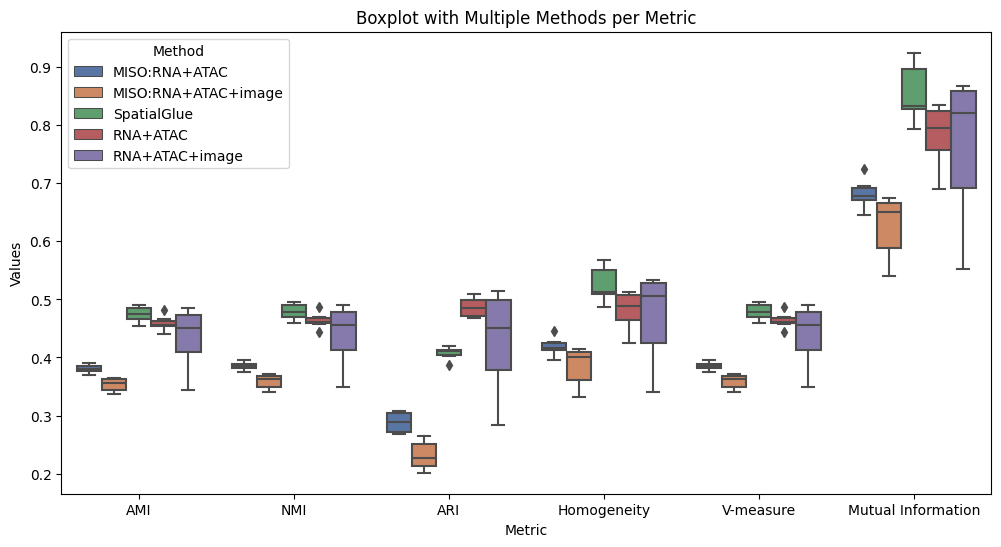

In [ ]:
# E13_5
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 创建示例数据
np.random.seed(10)
data = {
    'Method': np.repeat([ 'SpatialGlue', 'MISO:RNA+ATAC','MISO:RNA+ATAC+image', 'RNA+ATAC', 'RNA+ATAC+image'], 36),
    'Metric': np.tile(['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information'], 30),
    'Value':[
            0.3861, 0.3898, 0.3074, 0.3964, 0.3898, 0.6449, 
            0.3800, 0.3843, 0.2697, 0.4143, 0.3843, 0.6739, 
            0.3704, 0.3754, 0.2787, 0.4123, 0.3754, 0.6707, 
            0.3796, 0.3848, 0.2975, 0.4270, 0.3848, 0.6946, 
            0.3752, 0.3813, 0.2680, 0.4195, 0.3813, 0.6824, 
            0.3900, 0.3961, 0.3056, 0.4458, 0.3961, 0.7252,

            0.3413, 0.3455, 0.2542, 0.3323, 0.3455, 0.5406, 
            0.3363, 0.3412, 0.2115, 0.3495, 0.3412, 0.5685, 
            0.3607, 0.3658, 0.2381, 0.3971, 0.3658, 0.6460, 
            0.3634, 0.3691, 0.2015, 0.4144, 0.3691, 0.6742, 
            0.3522, 0.3583, 0.2651, 0.4036, 0.3583, 0.6566, 
            0.3654, 0.3718, 0.2157, 0.4108, 0.3718, 0.6683,
        
             0.4700,0.4732,0.4145,0.4872,0.4732,0.7926,
            0.4793,0.4830,0.4190,0.5119,0.4830,0.8327,
            0.4644,0.4688,0.4029,0.5081,0.4688,0.8265,
            0.4540,0.4590,0.3864,0.5127,0.4590,0.8340,
            0.4899,0.4951,0.4113,0.5639,0.4951,0.9173,
            0.4871,0.4928,0.4103,0.5685,0.4928,0.9248,

            0.4409524897956797, 0.4446466767798372, 0.48387744494237733, 0.42460840668927685, 0.4446466767798372, 0.6907103197001725,
            0.4655147071948242, 0.4696709439115611, 0.5095282178247033, 0.4623366000160444, 0.4696709439115611, 0.7520827561943735,
            0.4536945991207711, 0.4584081684653725, 0.48487987294448615, 0.47307948700050634, 0.4584081684653725, 0.769558206012706,
            0.4814520437522156, 0.4864904470203731, 0.5034721186364397, 0.5127546615462377, 0.4864904470203731, 0.8340977960512428,
            0.4551215409268962, 0.46085506972910995, 0.4671953355806203, 0.5048870431379243, 0.46085506972911, 0.8212995444375817,
            0.456963223514231, 0.4626663794322703, 0.46820708613939266, 0.507670229760001, 0.4626663794322703, 0.8258269529656154,

            0.34467071820940465, 0.34886557378803945, 0.28399120214650025, 0.3396937355268025, 0.34886557378803945, 0.5525796592095334,
            0.3977357954797321, 0.40223361434414756, 0.4129848854734124, 0.4045314202679633, 0.4022336143441475, 0.658051094185051,
            0.45938906662886825, 0.4639404397749235, 0.4900740771314384, 0.48620404199907885, 0.46394043977492355, 0.7909079142054134,
            0.48474780653395844, 0.489571287353838, 0.51425388046331, 0.5290936210280475, 0.489571287353838, 0.8606763746885413,
            0.4785509753822692, 0.4839711502448617, 0.5029388136520394, 0.5334579991202261, 0.48397115024486165, 0.8677759067275929,
            0.4411991592672402, 0.44724491200428085, 0.3661258476245408, 0.5241150949418103, 0.44724491200428085, 0.8525778083613397,

            

             
             ]
          
            
}

# 将数据转换为Pandas DataFrame
df = pd.DataFrame(data)
print(df)

# 画箱线图，每个指标都有多个方法的箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Value', hue='Method', data=df, palette='deep')
plt.title('Boxplot with Multiple Methods per Metric')
plt.ylabel('Values')
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E13_5/boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

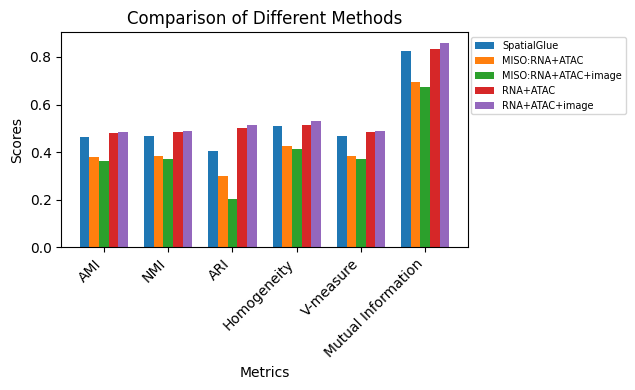

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['SpatialGlue','MISO:RNA+ATAC','MISO:RNA+ATAC+image',  'SpaMORL:RNA+ATAC','SpaMORL:RNA+ATAC+image']
data = {
    'Seurat':[ 0.3903,0.3952,0.2647,0.4347,0.3952,0.7071],
    'SpatialGlue':[ 0.4644,0.4688,0.4029,0.5081,0.4688,0.8265],
     'MISO:RNA+ATAC' :  [0.3796, 0.3848, 0.2975, 0.4270, 0.3848, 0.6946],
    'MISO:RNA+ATAC+image':[0.3634, 0.3691, 0.2015, 0.4144, 0.3691, 0.6742],
    'SpaMORL:RNA+ATAC':[0.4814520437522156, 0.4864904470203731, 0.5034721186364397, 0.5127546615462377, 0.4864904470203731, 0.8340977960512428],
    'SpaMORL:RNA+ATAC+image':[0.48474780653395844, 0.489571287353838, 0.51425388046331, 0.5290936210280475, 0.489571287353838, 0.8606763746885413],
    'default':[ 0.4203368430415226,  0.42531347792520735, 0.363350696475731, 0.43983716658627475,0.4253134779252074, 0.7154829371316263],
    }

# 设置图形大小
fig, ax = plt.subplots(figsize=(7, 4))

# 设置条形宽度
bar_width = 0.15
index = np.arange(len(labels))

# 绘制条形图
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method)

# 添加标签和标题
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Different Methods')
ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.5, fontsize=7)

# 显示图形
plt.tight_layout()
#plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E13_5/metrics.png', format='png')  # 修改路径和文件名
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E13_5/metrics_defalut.png', format='png')  # 修改路径和文件名

plt.show()


In [32]:

import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
import scanpy as sc
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import subprocess
import time
import os
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import cdist
from scipy.spatial import distance_matrix
import sys
import os
import pandas as pd
import scanpy as sc
import sys
import re
import torch
import multiprocessing
def calculate_icc(cluster_labels, data):
    unique_clusters = np.unique(cluster_labels)
    icc_values = []

    for cluster in unique_clusters:
        # 筛选出当前聚类的数据
        cluster_data = data[cluster_labels == cluster]
        # 计算当前聚类的组内方差
        within_cluster_variance = np.var(cluster_data, axis=0).mean()

        # 计算所有聚类均值
        all_cluster_means = []
        for other_cluster in unique_clusters:
            other_cluster_data = data[cluster_labels == other_cluster]
            other_cluster_mean = np.mean(other_cluster_data, axis=0)
            all_cluster_means.append(other_cluster_mean)
        all_cluster_means = np.array(all_cluster_means)
        # 计算各聚类均值之间的方差
        across_cluster_variance = np.var(all_cluster_means, axis=0).mean()

        # 计算ICC
        icc = within_cluster_variance / (within_cluster_variance + across_cluster_variance)
        icc_values.append(icc)

    return icc_values
#image
data = pd.read_csv('/home/lixiangyu/DMG/DMG-main/input/E13_5/E13_5_image_resnet_v2_cos_unnormalize.csv',index_col=0)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.values)
pca = PCA(n_components=50)
pca50_image = pca.fit_transform(data_scaled)

num_gpus = 4
# RNA
adata_omics1=sc.read('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E13_5/RNA.h5ad')
sc.pp.filter_genes(adata_omics1, min_cells=10)
sc.pp.normalize_total(adata_omics1, target_sum=1e4)
sc.pp.log1p(adata_omics1)
sc.pp.highly_variable_genes(adata_omics1, flavor="seurat_v3", n_top_genes=3000)
adata = adata_omics1[:, adata_omics1.var.highly_variable]
sc.tl.pca(adata, n_comps=50)
pca50_rna = adata.obsm['X_pca']

# ATAC
adata_omics1=sc.read('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E13_5/ATAC.h5ad')
sc.pp.filter_genes(adata_omics1, min_cells=10)
sc.pp.normalize_total(adata_omics1, target_sum=1e4)
sc.pp.log1p(adata_omics1)
sc.pp.highly_variable_genes(adata_omics1, flavor="seurat_v3", n_top_genes=3000)
adata = adata_omics1[:, adata_omics1.var.highly_variable]
sc.tl.pca(adata, n_comps=50)
pca50_atac = adata.obsm['X_pca']

In [36]:
labels_resnet = pd.read_csv("/home/lixiangyu/multi-omics/MOMG/benchmark/mouse_brain_MISAR/output_dmg/E13_5/resnet_E13_5_none_0.7_0.3_0.8_100_mclust_9_DMG_label.csv", index_col=0)
a = pd.DataFrame(labels_resnet)
labels_resnet = a['cluster_result']
labels_none = pd.read_csv("/home/lixiangyu/multi-omics/MOMG/benchmark/mouse_brain_MISAR/output_dmg/E13_5/E13_5_0.9_0.9_0.8_10_mclust_9_DMG_label.csv", index_col=0)
a = pd.DataFrame(labels_none)
labels_none = a['cluster_result']
labels_SpatialGlue=adata.obs['SpatialGlue_9']
labels_MISO=adata.obs['MISO_9']
labels_MISO_image=adata.obs['MISO_rp_9']

In [38]:
print('rna')
print(calculate_icc(labels_SpatialGlue, pca50_rna))
print(calculate_icc(labels_MISO, pca50_rna))
print(calculate_icc(labels_MISO_image, pca50_rna))
print(calculate_icc(labels_none, pca50_rna))
print(calculate_icc(labels_resnet, pca50_rna))
print('atac')
print(calculate_icc(labels_SpatialGlue, pca50_atac))
print(calculate_icc(labels_MISO, pca50_atac))
print(calculate_icc(labels_MISO_image, pca50_atac))
print(calculate_icc(labels_none, pca50_atac))
print(calculate_icc(labels_resnet, pca50_atac))
print('image')
print(calculate_icc(labels_MISO_image, pca50_image))
print(calculate_icc(labels_resnet, pca50_image))

rna
[0.85785073, 0.9230492, 0.71271247, 0.7788791, 0.92115664, 0.86326563, 0.7698477, 0.8337066, 0.8162899]
[0.86151856, 0.8169329, 0.929491, 0.8649499, 0.8661354, 0.62195736, 0.63377684, 0.7596495, 0.7511118]
[0.3711188, 0.54190826, 0.6111881, 0.24021988, 0.37240723, 0.7053253, 0.7765605, 0.48113418, 0.0]
[0.8521146, 0.8151631, 0.7415725, 0.6774891, 0.91282713, 0.7950486, 0.85668004, 0.82057154, 0.78213155]
[0.8351998, 0.8297979, 0.76896054, 0.7741576, 0.8744926, 0.9238992, 0.81512487, 0.8095434, 0.85342544]
atac
[0.6850216, 0.87871677, 0.5520405, 0.68846273, 0.8861414, 0.84189725, 0.67324257, 0.8191451, 0.7967502]
[0.7612224, 0.67982996, 0.841288, 0.76791084, 0.4482239, 0.39715368, 0.45770776, 0.48421404, 0.697102]
[0.5639178, 0.64020896, 0.35336733, 0.2664933, 0.34647965, 0.74001753, 0.7669569, 0.51575595, 0.0]
[0.5491924, 0.7190486, 0.7316925, 0.5784124, 0.8890307, 0.81119066, 0.82674694, 0.8657583, 0.8357058]
[0.7067588, 0.7878816, 0.67313343, 0.6916084, 0.5339556, 0.87018037, 0.8

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

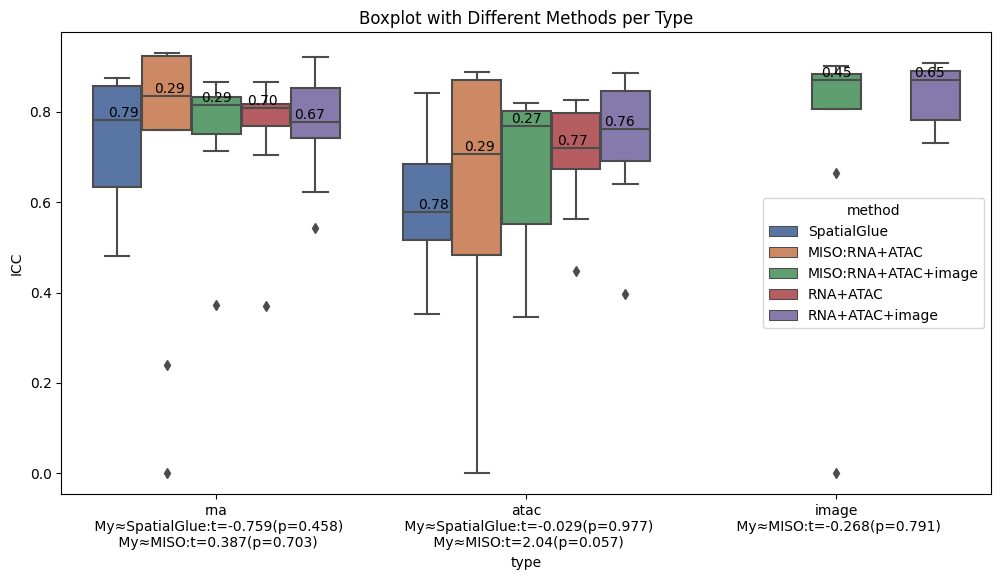

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 整理数据，将数据转换为适合绘图的格式
data_rna = [
    [0.85785073, 0.9230492, 0.71271247, 0.7788791, 0.92115664, 0.86326563, 0.7698477, 0.8337066, 0.8162899],
    [0.86151856, 0.8169329, 0.929491, 0.8649499, 0.8661354, 0.62195736, 0.63377684, 0.7596495, 0.7511118],
    [0.3711188, 0.54190826, 0.6111881, 0.24021988, 0.37240723, 0.7053253, 0.7765605, 0.48113418, 0.0],
    [0.8521146, 0.8151631, 0.7415725, 0.6774891, 0.91282713, 0.7950486, 0.85668004, 0.82057154, 0.78213155],
    [0.8351998, 0.8297979, 0.76896054, 0.7741576, 0.8744926, 0.9238992, 0.81512487, 0.8095434, 0.85342544]
]
data_atac = [
    [0.6850216, 0.87871677, 0.5520405, 0.68846273, 0.8861414, 0.84189725, 0.67324257, 0.8191451, 0.7967502],
    [0.7612224, 0.67982996, 0.841288, 0.76791084, 0.4482239, 0.39715368, 0.45770776, 0.48421404, 0.697102],
    [0.5639178, 0.64020896, 0.35336733, 0.2664933, 0.34647965, 0.74001753, 0.7669569, 0.51575595, 0.0],
    [0.5491924, 0.7190486, 0.7316925, 0.5784124, 0.8890307, 0.81119066, 0.82674694, 0.8657583, 0.8357058],
    [0.7067588, 0.7878816, 0.67313343, 0.6916084, 0.5339556, 0.87018037, 0.802602, 0.8177794, 0.84713256]
]
data_image = [
    [0.8709275436569972, 0.8283987067030494, 0.8410025194846079, 0.9003249202204804, 0.8827739389512658, 0.9073329993839466, 0.8889639247872808, 0.8912088113789431, 0.0],
    [0.7305195369911811, 0.8056609353525372, 0.8786866479949645, 0.8749833588192548, 0.7817921191777538, 0.9020615096879607, 0.7457519560828738, 0.6653285696770456, 0.8711096755807394]
]

# 转换为DataFrame
method_rna = ['SpatialGlue', 'MISO:RNA+ATAC', 'MISO:RNA+ATAC+image', 'RNA+ATAC', 'RNA+ATAC+image'] * len(data_rna[0])
method_atac = ['SpatialGlue', 'MISO:RNA+ATAC', 'MISO:RNA+ATAC+image', 'RNA+ATAC', 'RNA+ATAC+image'] * len(data_atac[0])
method_image = ['MISO:RNA+ATAC+image', 'RNA+ATAC+image'] * len(data_image[0])
# 双样本t检验的t统计量: -0.7592371395056726
# 双样本t检验的p值: 0.4587511352585677
# 双样本t检验的t统计量: 0.38787586060935436
# 双样本t检验的p值: 0.7032196299408726

# 双样本t检验的t统计量: -0.029199315214311808
# 双样本t检验的p值: 0.9770667445436909
# 双样本t检验的t统计量: 2.0436049045962927
# 双样本t检验的p值: 0.057818680254236775

# 双样本t检验的t统计量: -0.2682169317777571
# 双样本t检验的p值: 0.7919596400623082
df_rna = pd.DataFrame({
    'type': 'rna\n My≈SpatialGlue:t=-0.759(p=0.458)\n My≈MISO:t=0.387(p=0.703)',
    'method': method_rna,
    'value': [val for sublist in data_rna for val in sublist]
})
df_atac = pd.DataFrame({
    'type': 'atac\n My≈SpatialGlue:t=-0.029(p=0.977)\n My≈MISO:t=2.04(p=0.057)',
    'method': method_atac,
    'value': [val for sublist in data_atac for val in sublist]
})
df_image = pd.DataFrame({
    'type': 'image\n My≈MISO:t=-0.268(p=0.791)',
    'method': method_image,
    'value': [val for sublist in data_image for val in sublist]
})

df = pd.concat([df_rna, df_atac, df_image], ignore_index=True)

# 绘制箱线图
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='type', y='value', hue='method', data=df, palette='deep')

# 计算每组均值
# grouped_mean = df.groupby(['type', 'method'])['value'].mean()
# print(grouped_mean)
# 计算每组中位数
grouped_median = df.groupby(['type', 'method'])['value'].median()

# 获取x轴刻度标签和对应的位置
x_tick_labels = ax.get_xticklabels()
x_tick_positions = ax.get_xticks()

# 每个x轴刻度对应的箱子数量
num_boxes_per_tick = len(df['method'].unique())
# 箱子之间的间隔比例，可根据实际情况调整
box_spacing = 0.15
# 创建method与箱体偏移量的映射字典
method_offset_mapping = {
    'SpatialGlue': 0,
    'MISO:RNA+ATAC': 1,
    'MISO:RNA+ATAC+image': 2,
    'RNA+ATAC': 3,
    'RNA+ATAC+image': 4
}
data_rna = [
    [0.6275202, 0.9295305, 0.91374606, 0.7561516, 0.60666037, 0.8296063, 0.6943408, 0.87862283, 0.72674257, 0.8629379, 0.8757313, 0.7597304],
    [0.50285375, 0.7180447, 0.31843373, 0.0, 0.20872033, 0.0, 0.4578726, 0.4349547, 0.0, 0.2233855, 0.0, 0.5861172],
    [0.26616228, 0.5139746, 0.488133, 0.0, 0.0, 0.19470568, 0.0, 0.21557602, 0.5287498, 0.29930267, 0.21546026, 0.7219042],
    [0.40857157, 0.72854763, 0.87934273, 0.53313965, 0.74938834, 0.6123976, 0.8518221, 0.5740117, 0.86806643, 0.7020908, 0.75740963, 0.70896477],
    [0.6607551, 0.51034427, 0.7949113, 0.64578813, 0.778355, 0.54082614, 0.898045, 0.7326121, 0.7144437, 0.67913824, 0.37904736, 0.67204976],
]
data_atac = [
    [0.6273723, 0.88390034, 0.90302557, 0.75792545, 0.6607258, 0.6423723, 0.6982222, 0.8326036, 0.81255597, 0.8887394, 0.81156963, 0.83804613],
    [0.6226565, 0.73927504, 0.24815778, 0.0, 0.3262493, 0.0, 0.41856024, 0.29601735, 0.0, 0.30770043, 0.0, 0.5186333],
    [0.19250117, 0.3954113, 0.61744624, 0.0, 0.0, 0.16001888, 0.0, 0.25119328, 0.37407464, 0.19787236, 0.29170942, 0.7009804],
    [0.6161453, 0.7958139, 0.88679165, 0.6733159, 0.7170364, 0.78329206, 0.79606885, 0.67972314, 0.8365076, 0.8159407, 0.8061507, 0.85078126],
    [0.73956865, 0.684639, 0.83450335, 0.73868084, 0.73475903, 0.69676894, 0.90256304, 0.66388375, 0.8585007, 0.8407617, 0.60923266, 0.8469235],
]
data_image = [
    [0.5661084505130778, 0.6514785434509381, 0.5946041630932589, 0.0, 0.0, 0.5084660364491761, 0.0, 0.45864958911165854, 0.7423582540835317, 0.7111763817437906, 0.451350455153068, 0.6862740245051602],
    [0.8075428958516667, 0.5534442431436036, 0.7355838298448495, 0.6495964500520162, 0.8466865606056593, 0.5456230228864495, 0.7887932512449324, 0.7469815289335767, 0.7657684023747005, 0.32502598267827104, 0.39526712157234517, 0.6323672599235328]
]

methods_rna = ['SpatialGlue', 'MISO:RNA+ATAC', 'MISO:RNA+ATAC+image', 'RNA+ATAC', 'RNA+ATAC+image']
methods_atac = ['SpatialGlue', 'MISO:RNA+ATAC', 'MISO:RNA+ATAC+image', 'RNA+ATAC', 'RNA+ATAC+image']
methods_image = ['MISO:RNA+ATAC+image', 'RNA+ATAC+image']

grouped_mean = {}

# 计算 data_rna 的均值
for i, row in enumerate(data_rna):
    mean_val = sum(row) / len(row)
    category = 'rna\n My≈SpatialGlue:t=-0.759(p=0.458)\n My≈MISO:t=0.387(p=0.703)'
    method = methods_rna[i]
    grouped_mean[(category, method)] = mean_val

# 计算 data_atac 的均值
for i, row in enumerate(data_atac):
    mean_val = sum(row) / len(row)
    category = 'atac\n My≈SpatialGlue:t=-0.029(p=0.977)\n My≈MISO:t=2.04(p=0.057)'
    method = methods_atac[i]
    grouped_mean[(category, method)] = mean_val

# 计算 data_image 的均值
for i, row in enumerate(data_image):
    mean_val = sum(row) / len(row)
    category = 'image\n My≈MISO:t=-0.268(p=0.791)'
    method = methods_image[i]
    grouped_mean[(category, method)] = mean_val

# 遍历每组均值添加文本
for  i,((category, method), mean_val) in enumerate(grouped_mean.items()):
 
    if category == 'image':
        # 对于image类型的数据，手动指定箱子位置
        if method == 'MISO:RNA+ATAC+image':
            tick_index = list(df['type'].unique()).index(category)
            box_offset = 2  # 第2个位置
        elif method == 'RNA+ATAC+image':
            tick_index = list(df['type'].unique()).index(category)
            box_offset = 4  # 第5个位置
    else:
        # 对于其他类型的数据，按正常逻辑计算位置
        tick_index = list(df['type'].unique()).index(category)
        box_offset = method_offset_mapping[method] % num_boxes_per_tick

    # 计算文本的x坐标
    x = x_tick_positions[tick_index] + (box_offset - (num_boxes_per_tick - 1) / 2) * box_spacing

    # 获取当前组的中位数
    median_val = grouped_median[(category, method)]
    y = median_val 

    ax.text(x, y, f'{mean_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Boxplot with Different Methods per Type')
plt.ylabel('ICC')
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E13_5/ICC.png', dpi=300, bbox_inches='tight')
plt.show()

In [81]:

rna_glue=    [0.85785073, 0.9230492, 0.71271247, 0.7788791, 0.92115664, 0.86326563, 0.7698477, 0.8337066, 0.8162899]
rna_miso=    [0.86151856, 0.8169329, 0.929491, 0.8649499, 0.8661354, 0.62195736, 0.63377684, 0.7596495, 0.7511118]
rna_miso_image=    [0.3711188, 0.54190826, 0.6111881, 0.24021988, 0.37240723, 0.7053253, 0.7765605, 0.48113418, 0.0]
rna_my=    [0.8521146, 0.8151631, 0.7415725, 0.6774891, 0.91282713, 0.7950486, 0.85668004, 0.82057154, 0.78213155]
rna_my_image=    [0.8351998, 0.8297979, 0.76896054, 0.7741576, 0.8744926, 0.9238992, 0.81512487, 0.8095434, 0.85342544]
atac_glue=    [0.6850216, 0.87871677, 0.5520405, 0.68846273, 0.8861414, 0.84189725, 0.67324257, 0.8191451, 0.7967502]
atac_miso=    [0.7612224, 0.67982996, 0.841288, 0.76791084, 0.4482239, 0.39715368, 0.45770776, 0.48421404, 0.697102]
atac_miso_image=    [0.5639178, 0.64020896, 0.35336733, 0.2664933, 0.34647965, 0.74001753, 0.7669569, 0.51575595, 0.0]
atac_my=    [0.5491924, 0.7190486, 0.7316925, 0.5784124, 0.8890307, 0.81119066, 0.82674694, 0.8657583, 0.8357058]
atac_my_image=    [0.7067588, 0.7878816, 0.67313343, 0.6916084, 0.5339556, 0.87018037, 0.802602, 0.8177794, 0.84713256]
image_my=    [0.8709275436569972, 0.8283987067030494, 0.8410025194846079, 0.9003249202204804, 0.8827739389512658, 0.9073329993839466, 0.8889639247872808, 0.8912088113789431, 0.0]
image_miso=    [0.7305195369911811, 0.8056609353525372, 0.8786866479949645, 0.8749833588192548, 0.7817921191777538, 0.9020615096879607, 0.7457519560828738, 0.6653285696770456, 0.8711096755807394]

t_statistic, p_value = ttest_ind(rna_my,rna_glue)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(rna_my,rna_miso)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(atac_my,atac_glue)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(atac_my,atac_miso)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(image_my,image_miso)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)

双样本t检验的t统计量: -0.7592371395056726
双样本t检验的p值: 0.4587511352585677
双样本t检验的t统计量: 0.38787586060935436
双样本t检验的p值: 0.7032196299408726
双样本t检验的t统计量: -0.029199315214311808
双样本t检验的p值: 0.9770667445436909
双样本t检验的t统计量: 2.0436049045962927
双样本t检验的p值: 0.057818680254236775
双样本t检验的t统计量: -0.2682169317777571
双样本t检验的p值: 0.7919596400623082
